In [1]:
from __future__ import annotations
import sys
    # caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/')
sys.path

['D:\\books\\python\\0.Data Science from Scratch- First Principles with Python',
 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/',
 'C:\\Users\\lidan\\miniconda3\\python38.zip',
 'C:\\Users\\lidan\\miniconda3\\DLLs',
 'C:\\Users\\lidan\\miniconda3\\lib',
 'C:\\Users\\lidan\\miniconda3',
 '',
 'C:\\Users\\lidan\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\magic_impute-2.0.4-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\seqc-0.2.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\weasyprint-56.1-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\cairocffi-1.3.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\Pythonwin']

In [12]:
math.floor(13/5)

2

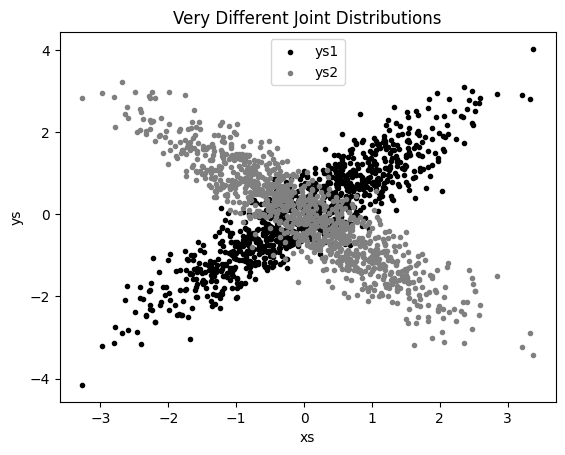

In [29]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)


import random
from probability import inverse_normal_cdf

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [30]:
#plt.savefig('im/working_scatter.png')
#plt.gca().clear()


from statistics import correlation

correlation(xs, ys1), correlation(xs, ys2)

(0.8989272294926463, -0.9012876587466002)

In [14]:
import random
from probability import inverse_normal_cdf
random.seed(0)
# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]
# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

uniform[:10]

[68.88437030500961,
 51.590880588060486,
 -15.885683833830996,
 -48.21664994140733,
 2.254944273721705,
 -19.01317250991714,
 56.75971780695451,
 -39.33745478421451,
 -4.680609169528836,
 16.676407891006235]

In [23]:
p = random.random()
p, inverse_normal_cdf(p)

(0.9835103706827385, 2.1323299407958984)

In [15]:
normal[:10]

[50.763559341430664,
 18.96437644958496,
 21.814985275268555,
 -78.38902473449707,
 9.092702865600586,
 33.36962699890137,
 -73.94894599914551,
 -59.80679512023926,
 -47.64876365661621,
 -39.27197456359863]

In [18]:
import numpy as np
np.std(normal), np.mean(normal)

(57.38810894703587, 0.1411157913208008)

In [24]:
import numpy as np
np.std(uniform), np.mean(uniform)

(57.55355211411035, 0.13168855231305984)

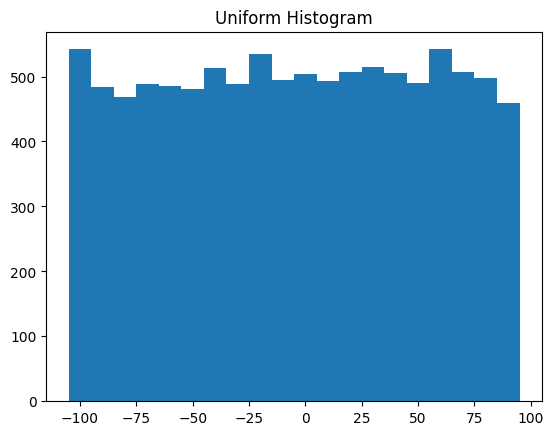

In [25]:
plot_histogram(uniform, 10, "Uniform Histogram")

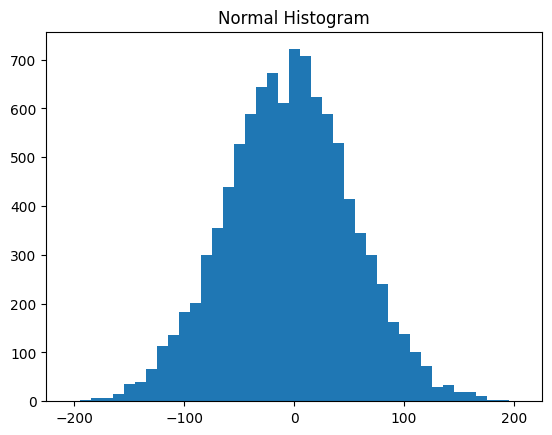

In [26]:
plot_histogram(normal, 10, "Normal Histogram")

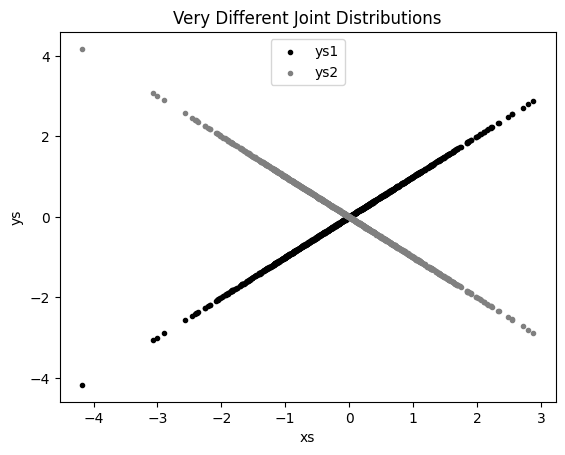

In [27]:
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 200 for x in xs]
ys2 = [-x + random_normal() / 200 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [28]:
#plt.savefig('im/working_scatter.png')
#plt.gca().clear()


from statistics import correlation

correlation(xs, ys1), correlation(xs, ys2)

(0.9999887090601407, -0.9999873681738298)

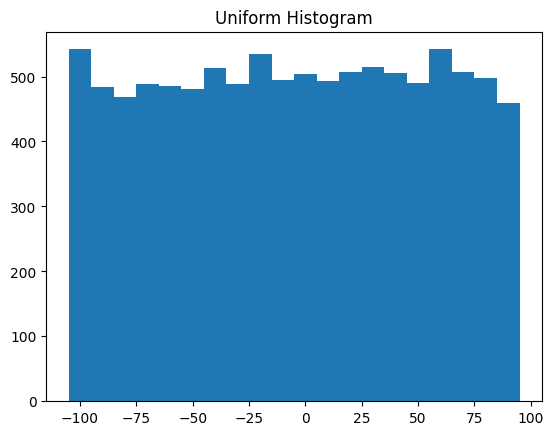

In [31]:
import random
from probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
              for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")

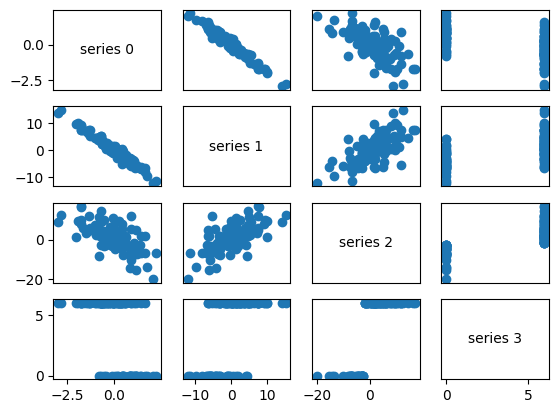

In [32]:
from typing import List

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # Scatter column_j on the x-axis vs column_i on the y-axis,
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

        # unless i == j, in which case show the series name.
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

        # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

In [33]:
random_row()

[1.2502765655517578, -4.8484039306640625, -1.9819831848144531, 6]

In [36]:
import numpy as np
np.shape(corr_data), len(corr_data)

((4, 100), 4)

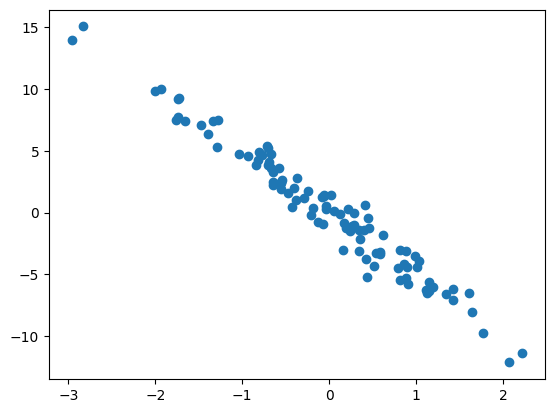

In [37]:
plt.scatter(corr_data[0], corr_data[1])

In [38]:
from linear_algebra import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)


vectors = [xs, ys1, ys2]
correlation_matrix(vectors)

[[1.0, 0.8989272294926463, -0.9012876587466002],
 [0.8989272294926463, 1.0, -0.8023135459985581],
 [-0.9012876587466003, -0.8023135459985581, 1.0000000000000002]]

In [39]:
assert correlation_matrix(vectors) == [
    [correlation(xs,  xs), correlation(xs,  ys1), correlation(xs,  ys2)],
    [correlation(ys1, xs), correlation(ys1, ys1), correlation(ys1, ys2)],
    [correlation(ys2, xs), correlation(ys2, ys1), correlation(ys2, ys2)],
]

In [40]:
import datetime
datetime.date(2014, 8, 29)

datetime.date(2014, 8, 29)

In [41]:
import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}

# oops, typo
stock_price['cosing_price'] = 103.06

prices: Dict[datetime.date, float] = {}

from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [45]:
from dataclasses import dataclass

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float
    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()
price2

StockPrice2(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [47]:
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))

# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03
stock

StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)

In [48]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None

# But should return same as before if data is good.
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock

In [50]:
from dateutil.parser import parse
import csv

with open("stocks.csv", "r") as f:
    reader = csv.DictReader(f)
    rows = [[row['Symbol'], row['Date'], row['Close']]
            for row in reader]
np.shape(rows)

(23105, 3)

In [51]:
rows[:4]

[['AAPL', '1980-12-12', '0.513393'],
 ['AAPL', '1980-12-15', '0.486607'],
 ['AAPL', '1980-12-16', '0.450893'],
 ['AAPL', '1980-12-17', '0.462054']]

In [56]:
# skip header
maybe_data = [try_parse_row(row) for row in rows]

# Make sure they all loaded successfully:
assert maybe_data
assert all(sp is not None for sp in maybe_data)
np.shape(maybe_data), maybe_data[:10]

((23105, 3),
 [StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 19), closing_price=0.504464),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 22), closing_price=0.529018),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 23), closing_price=0.551339),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 24), closing_price=0.580357),
  StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 26), closing_price=0.633929)])

In [57]:
# This is just to make mypy happy
data = [sp for sp in maybe_data if sp is not None]

max_aapl_price = max(stock_price.closing_price
                     for stock_price in data
                     if stock_price.symbol == "AAPL")
max_aapl_price

232.070007

In [58]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price
        
max_prices

defaultdict(<function __main__.<lambda>()>,
            {'AAPL': 232.070007,
             'MSFT': 115.610001,
             'FB': 217.5,
             'GOOG': 1268.329956})

In [65]:
from typing import List
from collections import defaultdict

# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)
    
prices['AAPL'][:5]

[StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446)]

In [66]:
[symbol for symbol, symbol_prices in prices.items()]

['AAPL', 'MSFT', 'FB', 'GOOG']

In [70]:
[symbol_prices for symbol, symbol_prices in prices.items()][0][:5]

[StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446)]

In [73]:
[symbol_prices for symbol_prices in prices.values()][0][:5]

[StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446)]

In [75]:
# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]

all_changes[:5]

[DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 15), pct_change=-0.05217445504710816),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 16), pct_change=-0.07339392980372261),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 17), pct_change=0.0247531010683244),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 18), pct_change=0.02898362529055043),
 DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 19), pct_change=0.061033219335108635)]

In [76]:
max_change = max(all_changes, key=lambda change: change.pct_change)
max_change

DailyChange(symbol='AAPL', date=datetime.date(1997, 8, 6), pct_change=0.33227854830957937)

In [79]:
# see, e.g. http://news.cnet.com/2100-1001-202143.html
assert max_change.symbol == 'AAPL'
assert max_change.date == datetime.date(1997, 8, 6)
assert 0.33 < max_change.pct_change < 0.34

In [78]:
min_change = min(all_changes, key=lambda change: change.pct_change)
min_change

DailyChange(symbol='AAPL', date=datetime.date(2000, 9, 29), pct_change=-0.5186915679972073)

In [80]:
# see, e.g. http://money.cnn.com/2000/09/29/markets/techwrap/
assert min_change.symbol == 'AAPL'
assert min_change.date == datetime.date(2000, 9, 29)
assert -0.52 < min_change.pct_change < -0.51

In [81]:
{month: [] for month in range(1, 13)}

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: []}

In [84]:
all_changes[0]

DailyChange(symbol='AAPL', date=datetime.date(1980, 12, 15), pct_change=-0.05217445504710816)

In [85]:
all_changes[0].date

datetime.date(1980, 12, 15)

In [83]:
all_changes[0].date.month

12

In [86]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}
changes_by_month  

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: []}

In [87]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}

for change in all_changes:
    changes_by_month[change.date.month].append(change)

avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}
avg_daily_change

{1: 0.0021865911307884013,
 2: 0.00014320928359588448,
 3: 0.0009950657322022312,
 4: 0.0017246603289960414,
 5: 0.001045801424244935,
 6: -0.00038890680439638084,
 7: 0.0008653144845121465,
 8: 0.0012329314091353012,
 9: -4.63670330797049e-06,
 10: 0.002905423893850083,
 11: 0.0008081709427041247,
 12: 0.0009192394682663616}

In [88]:
max(avg_daily_change.values())

0.002905423893850083

In [89]:
# October is the best month
assert avg_daily_change[10] == max(avg_daily_change.values())

In [90]:
from linear_algebra import distance

a_to_b = distance([63, 150], [67, 160])        # 10.77
a_to_c = distance([63, 150], [70, 171])        # 22.14
b_to_c = distance([67, 160], [70, 171])        # 11.40
a_to_b, a_to_c, b_to_c

(10.770329614269007, 22.135943621178654, 11.40175425099138)

In [91]:
a_to_b = distance([160, 150], [170.2, 160])    # 14.28
a_to_c = distance([160, 150], [177.8, 171])    # 27.53
b_to_c = distance([170.2, 160], [177.8, 171])  # 13.37
a_to_b, a_to_c, b_to_c

(14.284257068535268, 27.52889391167034, 13.370115930686627)

In [92]:
from typing import Tuple

from linear_algebra import vector_mean
from statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

In [93]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]
means, stdevs

([0.0, 0.0, 1.0], [1.0, 1.0, 0.0])

In [96]:
import tqdm
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it.
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

                t.set_description(f"{len(primes)} primes")

    return primes

my_primes = primes_up_to(100_000)
my_primes[:100]

9592 primes: 100%|█████████████████████████████████████████████████████████████| 99997/99997 [00:13<00:00, 7301.72it/s]


[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541]

In [97]:
import tqdm


pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

from linear_algebra import subtract

def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

from linear_algebra import magnitude

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

from linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

In [98]:
from gradient_descent import gradient_step

def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")

    return direction(guess)

In [100]:
de_meaned = de_mean(pca_data)
fpc = first_principal_component(de_meaned)
fpc

dv: 10279.151: 100%|████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 787.40it/s]


[0.9237307801943212, 0.3830423549969252]

In [101]:
assert 0.923 < fpc[0] < 0.925
assert 0.382 < fpc[1] < 0.384

In [102]:
from linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

from linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)

    return components

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

def main():

   
    import csv

    data: List[StockPrice] = []

    with open("comma_delimited_stock_prices.csv") as f:
        reader = csv.reader(f)
        for row in reader:
            maybe_stock = try_parse_row(row)
            if maybe_stock is None:
                print(f"skipping invalid row: {row}")
            else:
                data.append(maybe_stock)

if __name__ == "__main__": main()


skipping invalid row: ['MSFT', '6/19/2014', 'n/a']
